In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

matplotlib.style.use('ggplot')

In [37]:
cleaned=pd.read_csv("../input/vehiclesEDA.csv")

In [38]:
cleaned

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,17899,2012.0,volkswagen,excellent,4,gas,63500.0,clean,manual,4wd,hatchback,black,ut
1,0,2016.0,ford,excellent,6,gas,10.0,clean,automatic,4wd,pickup,white,ut
2,46463,2015.0,gmc,excellent,6,gas,7554.0,clean,automatic,4wd,truck,white,ut
3,0,2016.0,ford,excellent,6,gas,10.0,clean,automatic,4wd,pickup,white,ut
4,49999,2018.0,ford,like new,6,diesel,70150.0,clean,automatic,4wd,pickup,white,ut
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,15476,2012.0,nissan,excellent,6,gas,103135.0,clean,automatic,4wd,SUV,white,ut
509573,9881,2008.0,bmw,good,6,gas,108277.0,clean,automatic,2wd,convertible,white,ut
509574,24895,2019.0,jeep,like new,4,gas,6973.0,clean,automatic,4wd,SUV,white,ut
509575,32500,2017.0,unknown,excellent,6,gas,37520.0,clean,automatic,4wd,sedan,red,ut


### Cylinders

Text(0.5, 1.0, 'Cylinders')

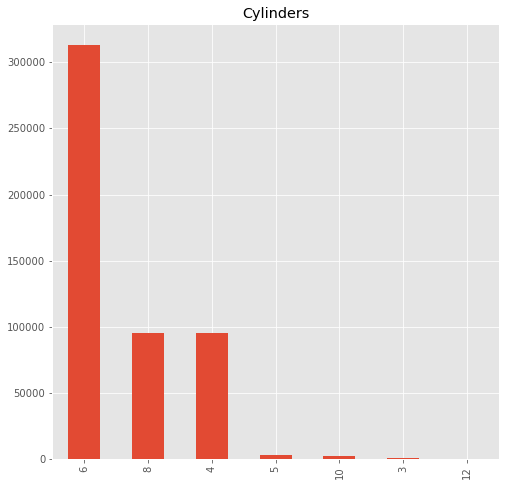

In [39]:
plt.figure(figsize=(8,8))
cleaned.cylinders.value_counts().plot.bar()
plt.title("Cylinders")

### Paint Color

Text(0.5, 1.0, 'Paint Color')

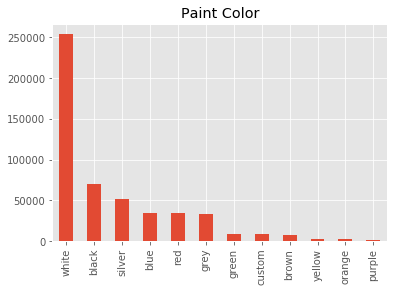

In [40]:
cleaned.paint_color.value_counts().plot.bar()
plt.title("Paint Color")

### Condition

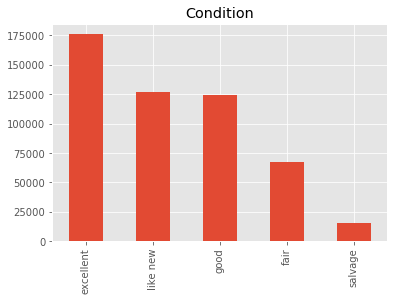

In [41]:
cleaned.condition.value_counts().plot.bar()
plt.title("Condition")
plt.show()

### Title Status

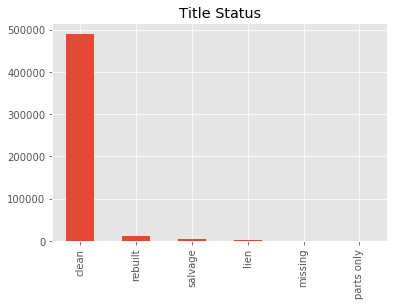

In [42]:
cleaned.title_status.value_counts().plot.bar()
plt.title("Title Status")
plt.show()

In [43]:
cleaned.drop(cleaned[cleaned["title_status"]=="parts only"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="missing"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="lien"].index,inplace=True)

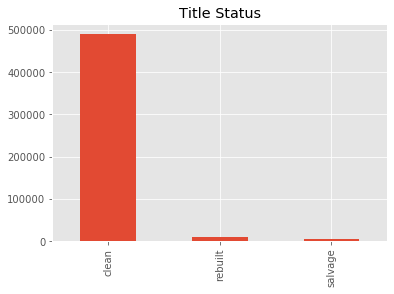

In [44]:
cleaned.title_status.value_counts().plot.bar()
plt.title("Title Status")
plt.show()

### Year

In [45]:
print ('Top 10 car manufacturing years:')
print (cleaned['year'].value_counts().iloc[:10])

Top 10 car manufacturing years:
2016.0    40920
2015.0    36996
2014.0    35380
2013.0    34883
2012.0    33281
2017.0    33175
2011.0    31242
2008.0    28387
2007.0    26057
2010.0    24178
Name: year, dtype: int64


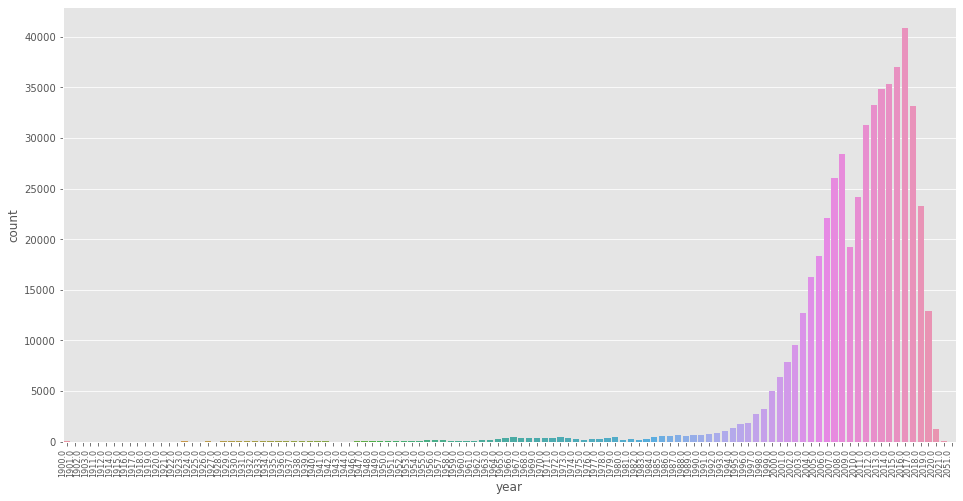

In [46]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='year',data=cleaned);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);

In [47]:
cleaned =  cleaned[(cleaned.year>=1960)]

yearmed=cleaned["year"].median()
for index, row in cleaned.iterrows():
    if(row["year"]>2020):
        cleaned.at[index,"year"]=yearmed

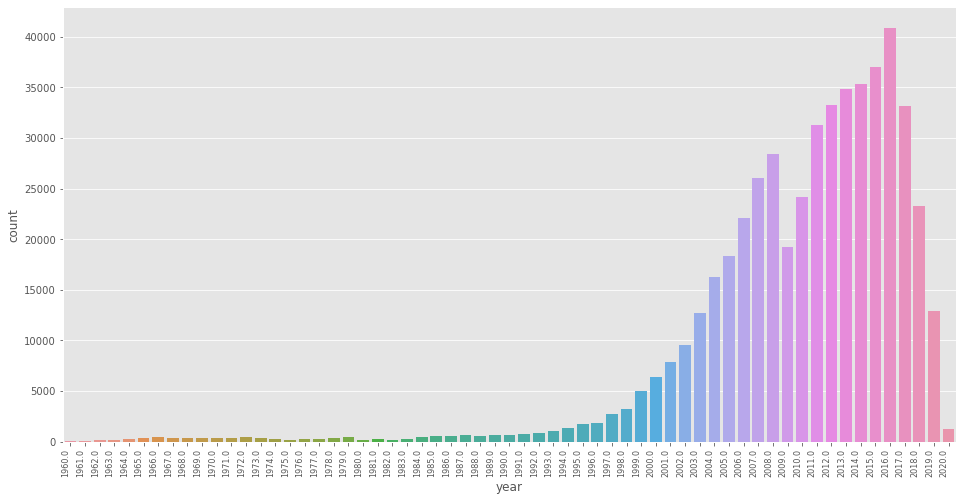

In [48]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='year',data=cleaned);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);

### Manufacturer

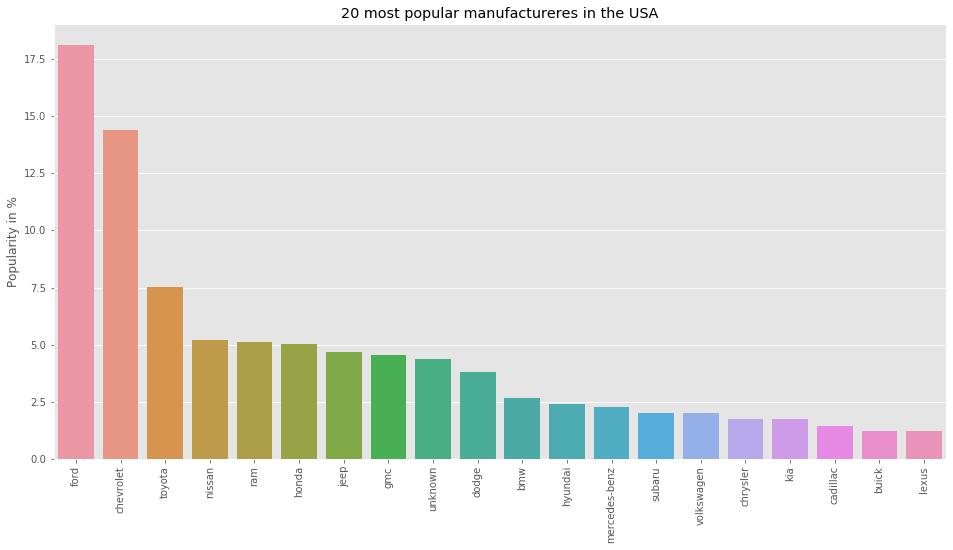

In [49]:
manufacturers = cleaned["manufacturer"].value_counts().div(len(cleaned)).mul(100)
manufactuters_TOP20 = manufacturers[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=manufactuters_TOP20.index, y=manufactuters_TOP20.values)
plt.title("20 most popular manufactureres in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

### Odometer

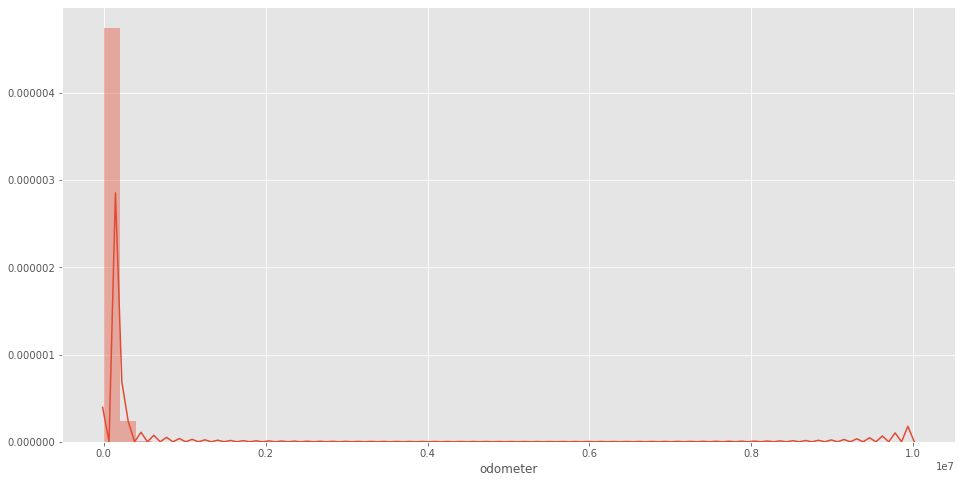

In [50]:
plt.figure(figsize=(16,8))
sns.distplot(cleaned.odometer)
plt.show()

In [51]:
cleaned.odometer.shape

(503902,)

In [52]:
cleaned=cleaned[(cleaned.odometer < 300000) & (cleaned.odometer > 10)]

In [53]:
cleaned.odometer.shape

(498112,)

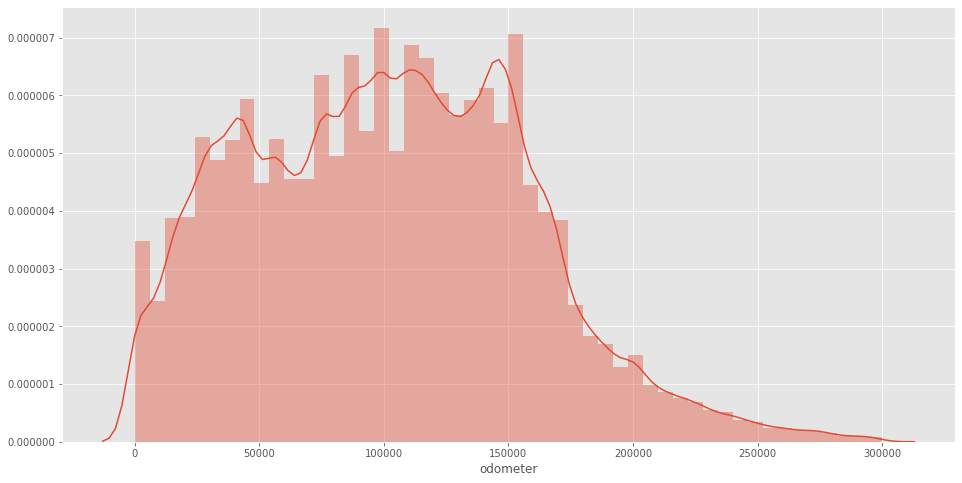

In [54]:
plt.figure(figsize=(16,8))
sns.distplot(cleaned.odometer)
plt.show()

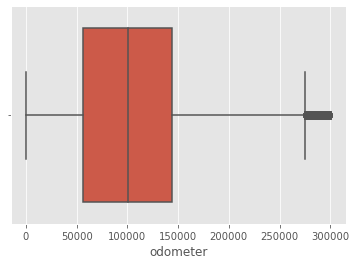

In [55]:
sns.boxplot(cleaned.odometer)

### State

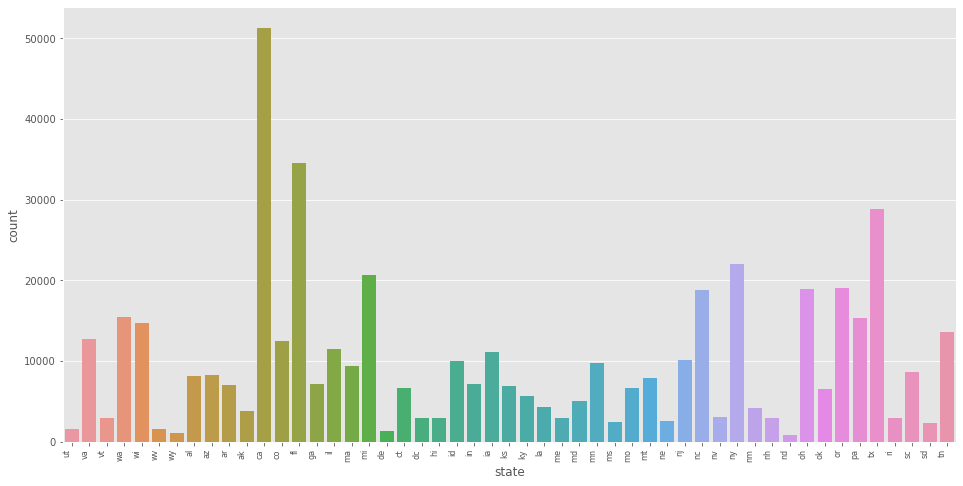

In [56]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='state',data=cleaned);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);

In [57]:
northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]

for index, row in cleaned.iterrows():
    if(row["state"] in northeast):
        cleaned.at[index,"state"]="northeast"
    if(row["state"] in midwest):
        cleaned.at[index,"state"]="midwest"
    if(row["state"] in south):
        cleaned.at[index,"state"]="south"
    if(row["state"] in west):
        cleaned.at[index,"state"]="west"

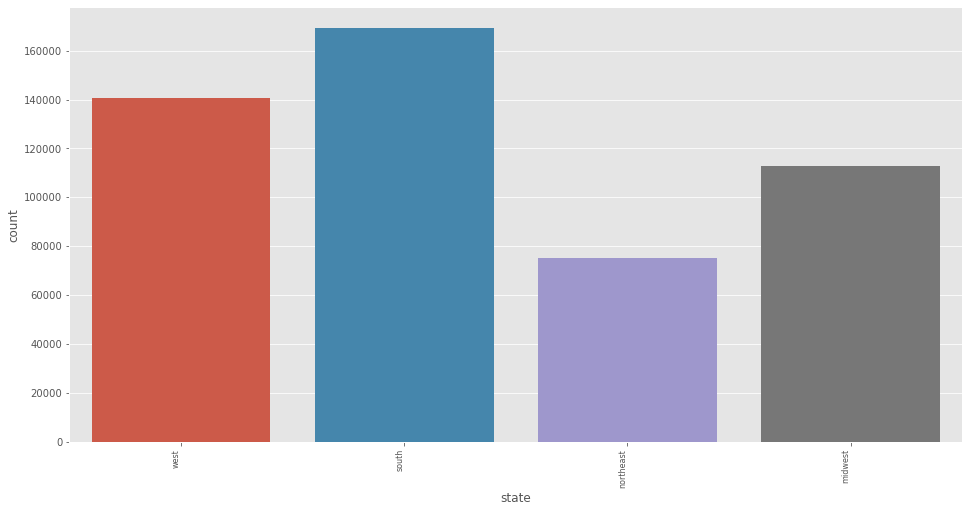

In [58]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='state',data=cleaned);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);

### Price

In [59]:
print (cleaned.price.describe())

count    4.981120e+05
mean     5.322229e+04
std      9.577200e+06
min      0.000000e+00
25%      3.998000e+03
50%      9.329000e+03
75%      1.792500e+04
max      3.600029e+09
Name: price, dtype: float64


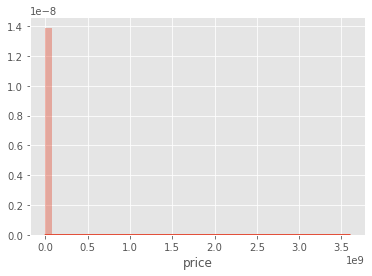

In [60]:
sns.distplot(cleaned.price)

In [61]:
cleaned.shape

(498112, 13)

In [62]:
cleaned.drop(cleaned[cleaned["price"]<2000].index,inplace=True)
cleaned.drop(cleaned[cleaned["price"]>40000].index,inplace=True)

In [63]:
cleaned.shape

(413647, 13)

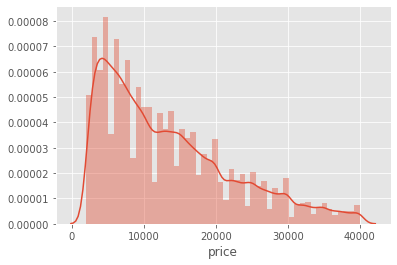

In [64]:
sns.distplot(cleaned.price)

### Visualize the Pairwise Relationships

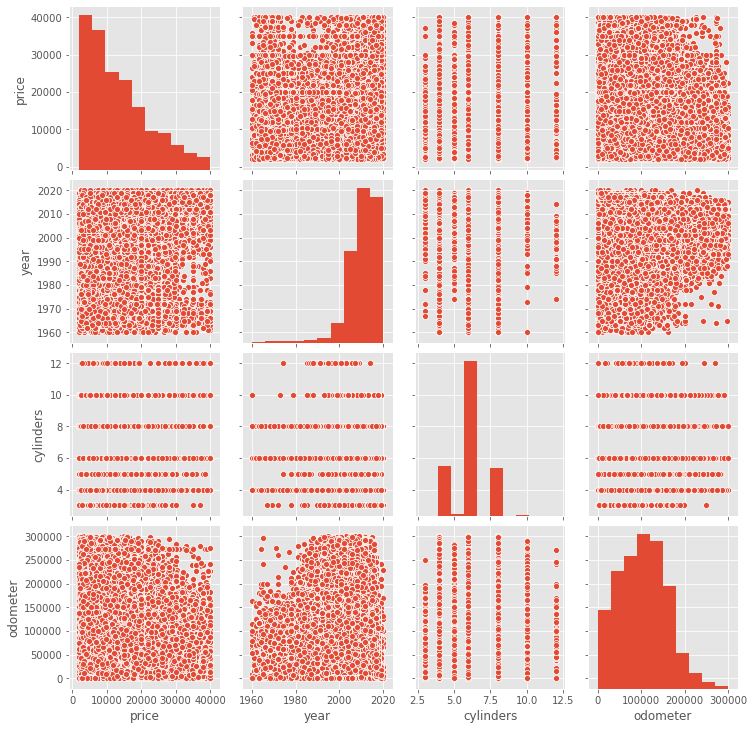

In [65]:
sns.pairplot(cleaned.loc[:,"price":"state"])
plt.show()

### Correlation Heatmap

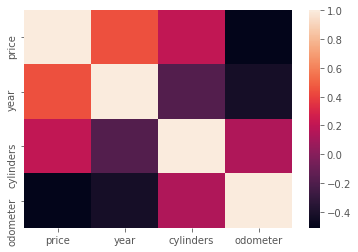

In [66]:
sns.heatmap(cleaned.loc[:,"price":"state"].corr())

In [67]:
cleaned.loc[:,"price":"state"].corr()

,price,year,cylinders,odometer
price,1.000000,0.445781,0.207075,-0.510991
year,0.445781,1.000000,-0.180491,-0.427740
cylinders,0.207075,-0.180491,1.000000,0.143468
odometer,-0.510991,-0.427740,0.143468,1.000000


### Feature Engineering

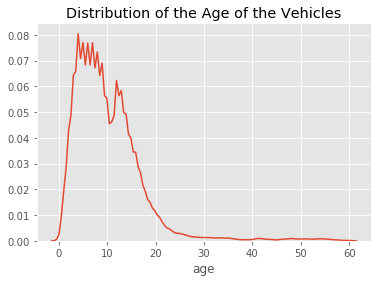

In [68]:
upd=cleaned
upd["age"] = upd.year.apply(lambda x: int(2020-x))

sns.distplot(upd.age, hist = False)
plt.title("Distribution of the Age of the Vehicles")
plt.show()

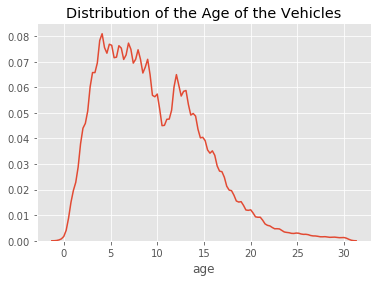

In [69]:
upd = upd[(upd.age >= 0) & (upd.age <= 30)]
sns.distplot(upd.age, hist = False)
plt.title("Distribution of the Age of the Vehicles")
plt.show()


### Best Time To Buy and Sell a Car

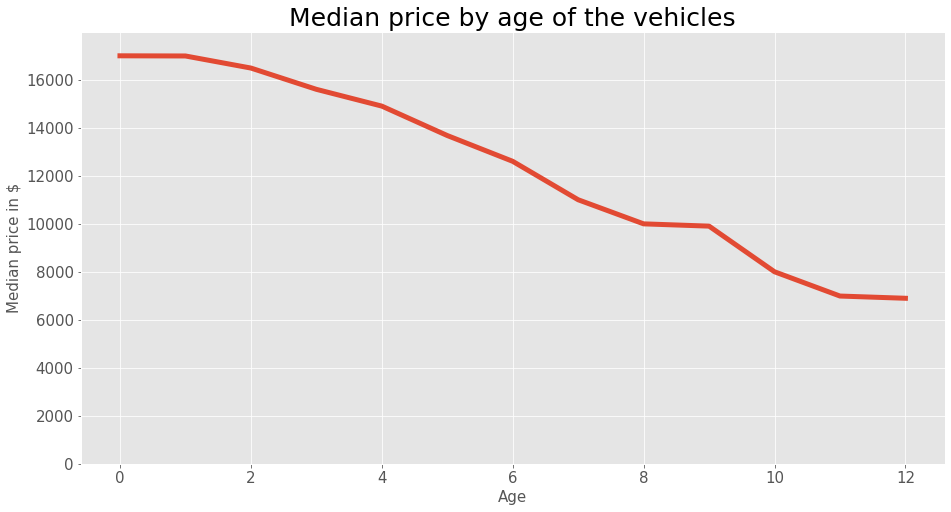

In [73]:
def display_price(df, age = (0,12), price = (2000,20000), vehicle_type = "all", state = "all"):
    
    if state != "all":
        df = df[df["state"] == state]
    
    if vehicle_type != "all":
        df = df[df["type"] == vehicle_type]
        
    df = df[(df["age"] <= age[1]) & (df["age"] >= age[0])]
    
    df = df[(df["price"] >= price[0]) & (df["price"] <= price[1])]
    
    price_age = pd.pivot_table(df, values = "price", index = "age", aggfunc= np.median)
    price_age.columns = ["Median Price"]
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes([0,0,1,1])
    
    ax.plot(price_age["Median Price"], lw = 5)
    
    ax.set_title(f"Median price by age of the vehicles",fontsize=25)
    ax.set_ylim(0,price_age["Median Price"].max()+1000)
    ax.set_xlabel("Age", fontsize = 15)
    ax.set_ylabel("Median price in $", fontsize = 15)
    
    ax.tick_params(axis='both', which='major', labelsize=15) 

    plt.show()
display_price(cleaned, vehicle_type="all")

### Price vs Odometer

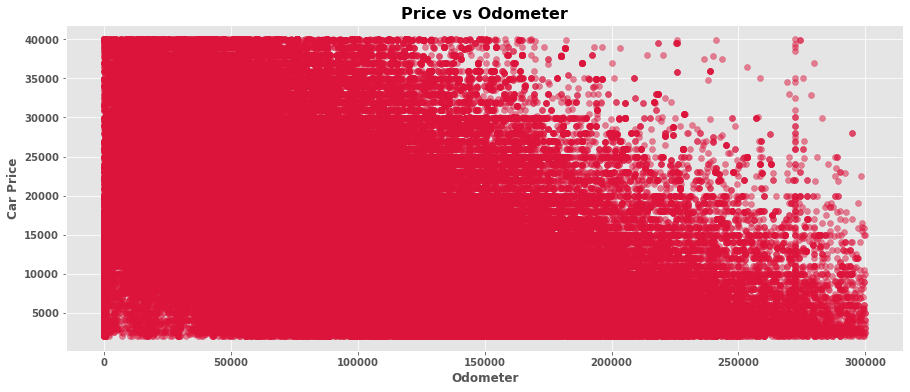

In [79]:
plt.figure(figsize=(15,6))
plt.scatter(x=cleaned.odometer, y=cleaned.price, color='crimson', alpha=0.5)
plt.title('Price vs Odometer', weight='bold', fontsize=16)
plt.xlabel('Odometer', weight='bold', fontsize=12)
plt.ylabel('Car Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

### Type vs Cylinders

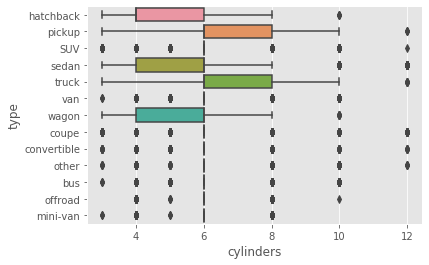

In [78]:
sns.boxplot(y=cleaned["type"],x=cleaned["cylinders"])

In [76]:
cleaned.to_csv("vehiclesModelling.csv",index=False)